# Setup and import dependencies

In [2]:
import pandas as pd
import numpy as np


# Load and prepare data 

In [74]:
df = pd.read_csv('datasets/smoking.csv')
df = df.drop(['ID', 'age', 'oral', 'hearing(left)', 'hearing(right)', 'eyesight(left)', 'eyesight(right)', 'waist(cm)', 'height(cm)','fasting blood sugar',	'Cholesterol',	'triglyceride',	'Urine protein'], axis=1)
df

,gender,weight(kg),systolic,relaxation,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,60,114.0,73.0,73.0,126.0,12.9,0.7,18.0,19.0,27.0,0,Y,0
1,F,60,119.0,70.0,42.0,127.0,12.7,0.6,22.0,19.0,18.0,0,Y,0
2,M,60,138.0,86.0,55.0,151.0,15.8,1.0,21.0,16.0,22.0,0,N,1
3,M,70,100.0,60.0,45.0,226.0,14.7,1.0,19.0,26.0,18.0,0,Y,0
4,F,60,120.0,74.0,62.0,107.0,12.5,0.6,16.0,14.0,22.0,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,65,110.0,68.0,75.0,118.0,12.3,0.6,14.0,7.0,10.0,1,Y,0
55688,F,50,101.0,62.0,73.0,79.0,14.0,0.9,20.0,12.0,14.0,0,Y,0
55689,F,50,117.0,72.0,79.0,63.0,12.4,0.5,17.0,11.0,12.0,0,N,0
55690,M,60,133.0,76.0,48.0,146.0,14.4,0.7,20.0,19.0,18.0,0,N,0


# Preprocessing and Splitting

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


x = df.drop(['smoking'], axis=1)
# x = df[['age', 'weight(kg)']]
y = df['smoking']

le = LabelEncoder()
x['gender'] = le.fit_transform(x['gender'])

x['tartar'] = le.fit_transform(x['tartar'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



# Implementing Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Classification Report

In [82]:
from sklearn.metrics import accuracy_score, classification_report
print("\nModel Performance Metrics:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Performance Metrics:
Accuracy Score: 0.7353442858425352

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      7027
           1       0.62      0.71      0.67      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.75      0.74      0.74     11139



# Visual Results


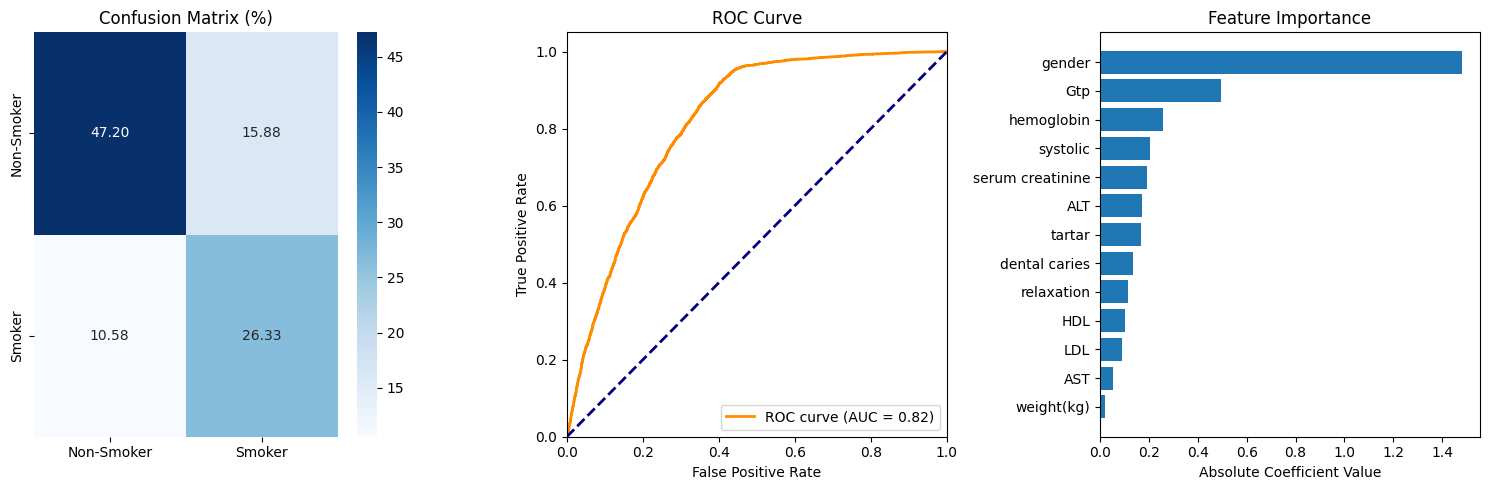

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
total = cm.sum()

cm_percentages = (cm / total) * 100

cm_percentages = np.round(cm_percentages, 2)

plt.figure(figsize=(15, 5))

# 1. Confusion Matrix Heatmap
plt.subplot(131)
sns.heatmap(cm_percentages, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])
plt.title('Confusion Matrix (%)')

# 2. ROC Curve
plt.subplot(132)
fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# 3. Feature Importance
plt.subplot(133)
feature_importance = pd.DataFrame({
    'feature': df.drop('smoking', axis=1).columns,
    'importance': abs(classifier.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=True)
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')

plt.tight_layout()
plt.show()

